In [1]:
import os

import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/home/fmeyer/miniconda3/envs/master/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
datapath = datapath = '/mnt/c/Users/fmeyer/Git/ood-detection/data'
pets_features_path = os.path.join(datapath, "pets_f_test.pt")
pets_targets_path = os.path.join(datapath, "pets_t_test.pt")
dtd_features_path = os.path.join(datapath, "dtd_f_test.pt")
dtd_targets_path = os.path.join(datapath, "dtd_t_test.pt")
flowers_features_path = os.path.join(datapath, "flowers_f_test.pt")
flowers_targets_path = os.path.join(datapath, "flowers_t_test.pt")

In [38]:
pets_features = torch.load(pets_features_path)
pets_targets = torch.load(pets_targets_path)
dtd_features = torch.load(dtd_features_path)
dtd_targets = torch.load(dtd_targets_path)
flowers_features = torch.load(flowers_features_path, map_location=torch.device('cpu'))

In [39]:
flowers_features.shape

torch.Size([1020, 1024])

In [40]:
pets_features.shape

torch.Size([555, 1024])

torch.Size([2280, 1024])


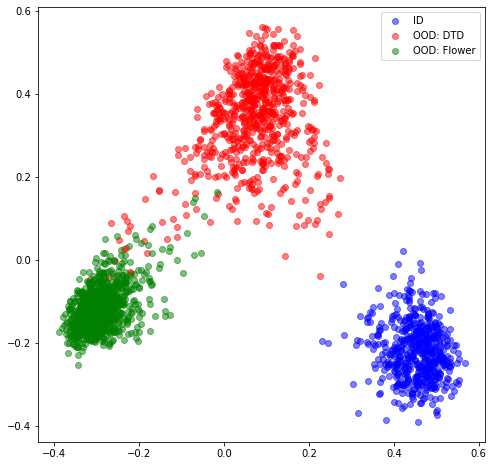

In [43]:
pca = PCA(n_components=2)
full = torch.cat((pets_features, dtd_features, flowers_features), dim=0)
print(full.shape)
pca.fit(full)
pets_pca = pca.transform(pets_features)
dtd_pca = pca.transform(dtd_features)
flowers_pca = pca.transform(flowers_features)
plt.figure(figsize=(8,8))
plt.scatter(pets_pca[:, 0], pets_pca[:, 1], color='blue', alpha=.5, label='ID')
plt.scatter(dtd_pca[:, 0], dtd_pca[:, 1], color='red', alpha=.5, label='OOD: DTD')
plt.scatter(flowers_pca[:, 0], flowers_pca[:,1], color='green', alpha=.5, label='OOD: Flower')
plt.legend()
plt.savefig("figure.png")
plt.show()


In [50]:
import os
DATAPATH = '/mnt/c/Users/fmeyer/Git/ood-detection/data'
PLOTS = os.path.join(DATAPATH, 'plots')
FEATURES = os.path.join(DATAPATH, 'features')
for a,b,c in os.walk(FEATURES):
    print("inside")
    print(f"a: {a}, \n b: {b}\n, c: {c}\n\n")

inside
a: /mnt/c/Users/fmeyer/Git/ood-detection/data/features, 
 b: []
, c: ['dtd_f_test.pt', 'dtd_t_test.pt', 'flowers_f_test.pt', 'flowers_t_test.pt', 'pets_f_test.pt', 'pets_t_test.pt']




In [47]:
print(os.path.exists(FEATURES))

False


In [48]:
FEATURES

'mnt/c/Users/fmeyer/Git/ood-detection/data/features'

In [51]:
a = {"1": 12, "2": 12}


In [53]:
for i, j in a.items():
    print(i, j)

1 12
2 12


In [54]:
hallo = 12


In [55]:
hallo.__name__

AttributeError: 'int' object has no attribute '__name__'